<h1> CR2 (part1) </h1>

In [1]:
#import libraries
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import pandas as pd

In [2]:
#load the Spain events json data into pandas dataframe
with open('/users/poojacj/Desktop/adm_hw2/events/events_Spain.json') as data_file:    
    data = json.load(data_file)
df_events = json_normalize(data, sep = "_")

In [3]:
df_events.head(10)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420
3,8,Simple pass,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,Pass,682,1H,8.805497,85,180864421
4,8,Simple pass,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,Pass,682,1H,14.047492,85,180864422
5,8,Simple pass,[{'id': 1801}],3277,"[{'y': 37, 'x': 31}, {'y': 83, 'x': 37}]",2565548,Pass,682,1H,18.480831,85,180864423
6,8,Simple pass,[{'id': 1801}],3695,"[{'y': 83, 'x': 37}, {'y': 53, 'x': 13}]",2565548,Pass,682,1H,23.978291,85,180864424
7,8,Simple pass,[{'id': 1801}],3486,"[{'y': 53, 'x': 13}, {'y': 41, 'x': 33}]",2565548,Pass,682,1H,28.831334,85,180864425
8,8,Simple pass,[{'id': 1801}],3277,"[{'y': 41, 'x': 33}, {'y': 79, 'x': 33}]",2565548,Pass,682,1H,30.844379,85,180864426
9,8,Simple pass,[{'id': 1801}],3695,"[{'y': 79, 'x': 33}, {'y': 98, 'x': 54}]",2565548,Pass,682,1H,34.267339,85,180864427


In [4]:
#loading the Spain matches data into pandas dataframe
with open('/users/poojacj/Desktop/adm_hw2/matches/matches_Spain.json') as data_file:    
    data = json.load(data_file)
df_matches = json_normalize(data, sep = "_")

In [5]:
#checking for Barcelona - Real Madrid game played on 5th May,2018
df_matches[df_matches["label"].str.contains("Barcelona - Real Madrid")]

,status,roundId,gameweek,seasonId,dateutc,winner,venue,wyId,label,date,...,teamsData_695_coachId,teamsData_695_side,teamsData_695_teamId,teamsData_695_score,teamsData_695_scoreP,teamsData_695_hasFormation,teamsData_695_formation_bench,teamsData_695_formation_lineup,teamsData_695_formation_substitutions,teamsData_695_scoreHT
23,Played,4406122,36,181144,2018-05-06 18:45:00,0,Camp Nou,2565907,"Barcelona - Real Madrid, 2 - 2","May 6, 2018 at 8:45:00 PM GMT+2",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#matching the wyId of matches data to matchId of events data to get the appropriate data
df_events  = df_events[df_events["matchId"] == 2565907]

In [7]:
#considering only passes,shoots,duels and freekicks
df_events = df_events[(df_events["eventId"] == 8) | (df_events["eventId"] == 3) | (df_events["eventId"] == 1) | (df_events["eventId"] == 10)]

In [8]:
#load the json player dataset into pandas dataframe
with open('/users/poojacj/Desktop/adm_hw2/players.json') as data_file:    
    data = json.load(data_file)
df_player = json_normalize(data, sep = "_")

In [9]:
#checking the wyId of Cristiano Ronaldo
df_player[df_player["firstName"] == "Cristiano Ronaldo"]

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,role_code2,role_code3,role_name,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
185,83,Cristiano Ronaldo,,dos Santos Aveiro,3159,1985-02-05,187,3322,right,Cristiano Ronaldo,...,620,PRT,PT,FW,FWD,Forward,Portugal,620,PRT,PT


In [10]:
#checking the wyId of Lionel Messi
df_player[df_player["lastName"].str.match("Messi")]

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,role_code2,role_code3,role_name,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
207,72,Lionel Andr\u00e9s,,Messi Cuccittini,676,1987-06-24,170,3359,left,L. Messi,...,724,ESP,ES,FW,FWD,Forward,Argentina,32,ARG,AR


In [11]:
#considering only the events by Cristiano Ronaldo
df_events_ronaldo = df_events[df_events["playerId"] == 3322]

In [12]:
#considering only the events by Lionel Messi
df_events_messi = df_events[df_events["playerId"] == 3359]

In [13]:
df_events_ronaldo

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
593473,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",2565907,Duel,675,1H,68.618689,13,249644112
593475,1,Air duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",2565907,Duel,675,1H,69.411334,10,249644113
593497,1,Ground defending duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",2565907,Duel,675,1H,114.548692,12,249644119
593552,1,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",2565907,Duel,675,1H,275.327960,11,249644145
593554,8,Cross,"[{'id': 401}, {'id': 801}, {'id': 1802}]",3322,"[{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]",2565907,Pass,675,1H,277.578035,80,249644146
593600,1,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",2565907,Duel,675,1H,403.870069,11,249644178
593601,8,Simple pass,[{'id': 1801}],3322,"[{'y': 36, 'x': 42}, {'y': 28, 'x': 42}]",2565907,Pass,675,1H,406.937034,85,249644179
593605,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 14, 'x': 91}, {'y': 14, 'x': 88}]",2565907,Duel,675,1H,418.749555,11,249644184
593607,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1203}, {'id'...",3322,"[{'y': 14, 'x': 88}, {'y': 100, 'x': 100}]",2565907,Shot,675,1H,419.789814,100,249644185
593628,1,Air duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 51, 'x': 93}, {'y': 31, 'x': 90}]",2565907,Duel,675,1H,476.363494,10,249644199


In [14]:
df_events_messi

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
593485,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]",2565907,Pass,676,1H,85.701277,85,249644574
593489,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]",2565907,Pass,676,1H,92.114223,85,249644578
593499,8,Simple pass,[{'id': 1801}],3359,"[{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]",2565907,Pass,676,1H,117.241765,85,249644587
593501,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",2565907,Duel,676,1H,122.168204,11,249644589
593503,8,Simple pass,[{'id': 1801}],3359,"[{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]",2565907,Pass,676,1H,124.686582,85,249644590
...,...,...,...,...,...,...,...,...,...,...,...,...
595053,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",3359,"[{'y': 76, 'x': 84}, {'y': 72, 'x': 96}]",2565907,Duel,676,2H,2197.469246,11,249646165
595055,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",3359,"[{'y': 72, 'x': 96}, {'y': 0, 'x': 0}]",2565907,Shot,676,2H,2199.766741,100,249646166
595106,1,Ground attacking duel,"[{'id': 602}, {'id': 702}, {'id': 1801}]",3359,"[{'y': 83, 'x': 44}, {'y': 93, 'x': 36}]",2565907,Duel,676,2H,2411.569686,11,249646184
595131,8,Launch,[{'id': 1802}],3359,"[{'y': 8, 'x': 44}, {'y': 42, 'x': 63}]",2565907,Pass,676,2H,2558.961654,84,249646196


In [15]:
#separating out the position values for Ronaldo
filtered_data_start_pos = []
filtered_data_end_pos = []
for i,x in df_events_ronaldo['positions'].items():
    filtered_data_start_pos.append({'index': i, 'start_pos': x[0]})
    filtered_data_end_pos.append({'index': i, 'start_pos': x[1]})   

In [16]:
filtered_data_start_pos = pd.DataFrame(filtered_data_start_pos)
filtered_data_end_pos = pd.DataFrame(filtered_data_end_pos)

In [17]:
#setting the index 
filtered_data_start_pos = filtered_data_start_pos.set_index('index')
filtered_data_end_pos = filtered_data_end_pos.set_index('index') 

In [18]:
#merge events and filtered position dataframes on index
df_events_ronaldo = df_events_ronaldo.merge(filtered_data_start_pos, left_index=True, right_index=True)

In [19]:
#merge events and filtered position dataframes on index
df_events_ronaldo = df_events_ronaldo.merge(filtered_data_end_pos, left_index=True, right_index=True)

In [20]:
df_events_ronaldo.drop(['eventId','subEventName','tags','matchPeriod','eventSec','subEventId'], axis=1, inplace=True)

In [21]:
df_events_ronaldo

,playerId,positions,matchId,eventName,teamId,id,start_pos_x,start_pos_y
593473,3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",2565907,Duel,675,249644112,"{'y': 19, 'x': 49}","{'y': 17, 'x': 49}"
593475,3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",2565907,Duel,675,249644113,"{'y': 17, 'x': 49}","{'y': 19, 'x': 38}"
593497,3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",2565907,Duel,675,249644119,"{'y': 13, 'x': 65}","{'y': 23, 'x': 53}"
593552,3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",2565907,Duel,675,249644145,"{'y': 12, 'x': 93}","{'y': 8, 'x': 97}"
593554,3322,"[{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]",2565907,Pass,675,249644146,"{'y': 8, 'x': 97}","{'y': 100, 'x': 100}"
593600,3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",2565907,Duel,675,249644178,"{'y': 57, 'x': 46}","{'y': 36, 'x': 42}"
593601,3322,"[{'y': 36, 'x': 42}, {'y': 28, 'x': 42}]",2565907,Pass,675,249644179,"{'y': 36, 'x': 42}","{'y': 28, 'x': 42}"
593605,3322,"[{'y': 14, 'x': 91}, {'y': 14, 'x': 88}]",2565907,Duel,675,249644184,"{'y': 14, 'x': 91}","{'y': 14, 'x': 88}"
593607,3322,"[{'y': 14, 'x': 88}, {'y': 100, 'x': 100}]",2565907,Shot,675,249644185,"{'y': 14, 'x': 88}","{'y': 100, 'x': 100}"
593628,3322,"[{'y': 51, 'x': 93}, {'y': 31, 'x': 90}]",2565907,Duel,675,249644199,"{'y': 51, 'x': 93}","{'y': 31, 'x': 90}"


In [22]:
#rename the column names
df_events_ronaldo.columns = ['playerId','positions','matchId','eventName','teamId','id','start_position','end_position']

In [23]:
#rescaling the x and y coordinates
x_y_pos_start = []
for i,j in df_events_ronaldo["start_position"].items():
    x_y_pos_start.append({'index': i, 'start_pos': [j['x']*1.2,j['y']*0.8]})

In [24]:
start_pos = pd.DataFrame(x_y_pos_start)

In [25]:
start_pos 

,index,start_pos
0,593473,"[58.8, 15.200000000000001]"
1,593475,"[58.8, 13.600000000000001]"
2,593497,"[78.0, 10.4]"
3,593552,"[111.6, 9.600000000000001]"
4,593554,"[116.39999999999999, 6.4]"
5,593600,"[55.199999999999996, 45.6]"
6,593601,"[50.4, 28.8]"
7,593605,"[109.2, 11.200000000000001]"
8,593607,"[105.6, 11.200000000000001]"
9,593628,"[111.6, 40.800000000000004]"


In [26]:
#setting the index 
start_pos = start_pos.set_index('index')

In [27]:
#merge teams and filtered dataframes on index
df_events_ronaldo = df_events_ronaldo.merge(start_pos, left_index=True, right_index=True)

In [28]:
df_events_ronaldo

,playerId,positions,matchId,eventName,teamId,id,start_position,end_position,start_pos
593473,3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",2565907,Duel,675,249644112,"{'y': 19, 'x': 49}","{'y': 17, 'x': 49}","[58.8, 15.200000000000001]"
593475,3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",2565907,Duel,675,249644113,"{'y': 17, 'x': 49}","{'y': 19, 'x': 38}","[58.8, 13.600000000000001]"
593497,3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",2565907,Duel,675,249644119,"{'y': 13, 'x': 65}","{'y': 23, 'x': 53}","[78.0, 10.4]"
593552,3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",2565907,Duel,675,249644145,"{'y': 12, 'x': 93}","{'y': 8, 'x': 97}","[111.6, 9.600000000000001]"
593554,3322,"[{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]",2565907,Pass,675,249644146,"{'y': 8, 'x': 97}","{'y': 100, 'x': 100}","[116.39999999999999, 6.4]"
593600,3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",2565907,Duel,675,249644178,"{'y': 57, 'x': 46}","{'y': 36, 'x': 42}","[55.199999999999996, 45.6]"
593601,3322,"[{'y': 36, 'x': 42}, {'y': 28, 'x': 42}]",2565907,Pass,675,249644179,"{'y': 36, 'x': 42}","{'y': 28, 'x': 42}","[50.4, 28.8]"
593605,3322,"[{'y': 14, 'x': 91}, {'y': 14, 'x': 88}]",2565907,Duel,675,249644184,"{'y': 14, 'x': 91}","{'y': 14, 'x': 88}","[109.2, 11.200000000000001]"
593607,3322,"[{'y': 14, 'x': 88}, {'y': 100, 'x': 100}]",2565907,Shot,675,249644185,"{'y': 14, 'x': 88}","{'y': 100, 'x': 100}","[105.6, 11.200000000000001]"
593628,3322,"[{'y': 51, 'x': 93}, {'y': 31, 'x': 90}]",2565907,Duel,675,249644199,"{'y': 51, 'x': 93}","{'y': 31, 'x': 90}","[111.6, 40.800000000000004]"


In [29]:
#rescaling the x and y coordinates
x_y_pos_end = []
for i,j in df_events_ronaldo["end_position"].items():
    x_y_pos_end.append({'index': i, 'end_pos': [j['x']*1.2,j['y']*0.8]})

In [30]:
end_pos = pd.DataFrame(x_y_pos_end)

In [31]:
end_pos

,index,end_pos
0,593473,"[58.8, 13.600000000000001]"
1,593475,"[45.6, 15.200000000000001]"
2,593497,"[63.599999999999994, 18.400000000000002]"
3,593552,"[116.39999999999999, 6.4]"
4,593554,"[120.0, 80.0]"
5,593600,"[50.4, 28.8]"
6,593601,"[50.4, 22.400000000000002]"
7,593605,"[105.6, 11.200000000000001]"
8,593607,"[120.0, 80.0]"
9,593628,"[108.0, 24.8]"


In [32]:
#setting the index 
end_pos = end_pos.set_index('index')

In [33]:
#merge teams and filtered dataframes on index
df_events_ronaldo = df_events_ronaldo.merge(end_pos, left_index=True, right_index=True)

In [34]:
df_events_ronaldo

,playerId,positions,matchId,eventName,teamId,id,start_position,end_position,start_pos,end_pos
593473,3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",2565907,Duel,675,249644112,"{'y': 19, 'x': 49}","{'y': 17, 'x': 49}","[58.8, 15.200000000000001]","[58.8, 13.600000000000001]"
593475,3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",2565907,Duel,675,249644113,"{'y': 17, 'x': 49}","{'y': 19, 'x': 38}","[58.8, 13.600000000000001]","[45.6, 15.200000000000001]"
593497,3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",2565907,Duel,675,249644119,"{'y': 13, 'x': 65}","{'y': 23, 'x': 53}","[78.0, 10.4]","[63.599999999999994, 18.400000000000002]"
593552,3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",2565907,Duel,675,249644145,"{'y': 12, 'x': 93}","{'y': 8, 'x': 97}","[111.6, 9.600000000000001]","[116.39999999999999, 6.4]"
593554,3322,"[{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]",2565907,Pass,675,249644146,"{'y': 8, 'x': 97}","{'y': 100, 'x': 100}","[116.39999999999999, 6.4]","[120.0, 80.0]"
593600,3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",2565907,Duel,675,249644178,"{'y': 57, 'x': 46}","{'y': 36, 'x': 42}","[55.199999999999996, 45.6]","[50.4, 28.8]"
593601,3322,"[{'y': 36, 'x': 42}, {'y': 28, 'x': 42}]",2565907,Pass,675,249644179,"{'y': 36, 'x': 42}","{'y': 28, 'x': 42}","[50.4, 28.8]","[50.4, 22.400000000000002]"
593605,3322,"[{'y': 14, 'x': 91}, {'y': 14, 'x': 88}]",2565907,Duel,675,249644184,"{'y': 14, 'x': 91}","{'y': 14, 'x': 88}","[109.2, 11.200000000000001]","[105.6, 11.200000000000001]"
593607,3322,"[{'y': 14, 'x': 88}, {'y': 100, 'x': 100}]",2565907,Shot,675,249644185,"{'y': 14, 'x': 88}","{'y': 100, 'x': 100}","[105.6, 11.200000000000001]","[120.0, 80.0]"
593628,3322,"[{'y': 51, 'x': 93}, {'y': 31, 'x': 90}]",2565907,Duel,675,249644199,"{'y': 51, 'x': 93}","{'y': 31, 'x': 90}","[111.6, 40.800000000000004]","[108.0, 24.8]"


In [35]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = patches.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = patches.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = patches.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = patches.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = patches.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = patches.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = patches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = patches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

<h1> Zones in the heatmap where Critiano Ronaldo was more active </h1>

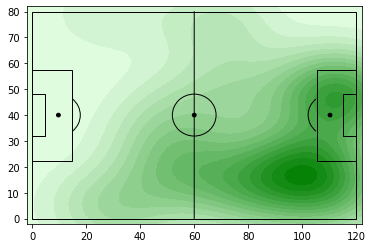

In [36]:
# fig=plt.figure() #set up the figures
# fig.set_size_inches(7, 5)
# ax=fig.add_subplot(1,1,1)

fig, ax = plt.subplots()

x_coord = [i[0] for i in df_events_ronaldo["start_pos"]]
y_coord = [i[1] for i in df_events_ronaldo["start_pos"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 16)

draw_pitch(ax) #overlay our different objects on the pitch

plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')
plt.show()

<h4> Cristiano Ronaldo's heatmap for the match Barcelona vs Real Madrid played on the 6 May,2018 clearly shows that he is a right wing attacking player who runs up and down his side of the pitch. He is not a defending player as there
is no movement recorded in the defensive positions. However, there is movement recorded in the penalty box of the opposition which indicates his central attacking ability. Also, the heatmap suggests that he fulfils the role of a striker. 
</h4>

In [38]:
 #separating out the position values for Messi
filtered_data_start_pos_messi = []
filtered_data_end_pos_messi = []
for i,x in df_events_messi['positions'].items():
    filtered_data_start_pos_messi.append({'index': i, 'start_pos': x[0]})
    filtered_data_end_pos_messi.append({'index': i, 'start_pos': x[1]})  

In [39]:
filtered_data_start_pos_messi = pd.DataFrame(filtered_data_start_pos_messi)
filtered_data_end_pos_messi = pd.DataFrame(filtered_data_end_pos_messi)

In [40]:
#setting the index 
filtered_data_start_pos_messi = filtered_data_start_pos_messi.set_index('index')
filtered_data_end_pos_messi = filtered_data_end_pos_messi.set_index('index') 

In [41]:
#merge events and filtered position dataframes on index
df_events_messi = df_events_messi.merge(filtered_data_start_pos_messi, left_index=True, right_index=True)

In [42]:
#merge events and filtered position dataframes on index
df_events_messi = df_events_messi.merge(filtered_data_end_pos_messi, left_index=True, right_index=True)

In [43]:
df_events_messi.drop(['eventId','subEventName','tags','matchPeriod','eventSec','subEventId'], axis=1, inplace=True)

In [44]:
df_events_messi

,playerId,positions,matchId,eventName,teamId,id,start_pos_x,start_pos_y
593485,3359,"[{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]",2565907,Pass,676,249644574,"{'y': 87, 'x': 74}","{'y': 91, 'x': 80}"
593489,3359,"[{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]",2565907,Pass,676,249644578,"{'y': 87, 'x': 67}","{'y': 71, 'x': 43}"
593499,3359,"[{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]",2565907,Pass,676,249644587,"{'y': 66, 'x': 58}","{'y': 78, 'x': 75}"
593501,3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",2565907,Duel,676,249644589,"{'y': 67, 'x': 65}","{'y': 38, 'x': 63}"
593503,3359,"[{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]",2565907,Pass,676,249644590,"{'y': 38, 'x': 63}","{'y': 43, 'x': 69}"
...,...,...,...,...,...,...,...,...
595053,3359,"[{'y': 76, 'x': 84}, {'y': 72, 'x': 96}]",2565907,Duel,676,249646165,"{'y': 76, 'x': 84}","{'y': 72, 'x': 96}"
595055,3359,"[{'y': 72, 'x': 96}, {'y': 0, 'x': 0}]",2565907,Shot,676,249646166,"{'y': 72, 'x': 96}","{'y': 0, 'x': 0}"
595106,3359,"[{'y': 83, 'x': 44}, {'y': 93, 'x': 36}]",2565907,Duel,676,249646184,"{'y': 83, 'x': 44}","{'y': 93, 'x': 36}"
595131,3359,"[{'y': 8, 'x': 44}, {'y': 42, 'x': 63}]",2565907,Pass,676,249646196,"{'y': 8, 'x': 44}","{'y': 42, 'x': 63}"


In [45]:
#rename the column names
df_events_messi.columns = ['playerId','positions','matchId','eventName','teamId','id','start_position','end_position']

In [46]:
x_y_pos_start_messi = []
for i,j in df_events_messi["start_position"].items():
    x_y_pos_start_messi.append({'index': i, 'start_pos': [j['x']*1.2,j['y']*0.8]})

In [47]:
start_pos_messi = pd.DataFrame(x_y_pos_start_messi)

In [48]:
start_pos_messi

,index,start_pos
0,593485,"[88.8, 69.60000000000001]"
1,593489,"[80.39999999999999, 69.60000000000001]"
2,593499,"[69.6, 52.800000000000004]"
3,593501,"[78.0, 53.6]"
4,593503,"[75.6, 30.400000000000002]"
...,...,...
87,595053,"[100.8, 60.800000000000004]"
88,595055,"[115.19999999999999, 57.6]"
89,595106,"[52.8, 66.4]"
90,595131,"[52.8, 6.4]"


In [49]:
#setting the index 
start_pos_messi = start_pos_messi.set_index('index')

In [50]:
#merge teams and filtered dataframes on index
df_events_messi = df_events_messi.merge(start_pos_messi, left_index=True, right_index=True)

In [51]:
df_events_messi

,playerId,positions,matchId,eventName,teamId,id,start_position,end_position,start_pos
593485,3359,"[{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]",2565907,Pass,676,249644574,"{'y': 87, 'x': 74}","{'y': 91, 'x': 80}","[88.8, 69.60000000000001]"
593489,3359,"[{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]",2565907,Pass,676,249644578,"{'y': 87, 'x': 67}","{'y': 71, 'x': 43}","[80.39999999999999, 69.60000000000001]"
593499,3359,"[{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]",2565907,Pass,676,249644587,"{'y': 66, 'x': 58}","{'y': 78, 'x': 75}","[69.6, 52.800000000000004]"
593501,3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",2565907,Duel,676,249644589,"{'y': 67, 'x': 65}","{'y': 38, 'x': 63}","[78.0, 53.6]"
593503,3359,"[{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]",2565907,Pass,676,249644590,"{'y': 38, 'x': 63}","{'y': 43, 'x': 69}","[75.6, 30.400000000000002]"
...,...,...,...,...,...,...,...,...,...
595053,3359,"[{'y': 76, 'x': 84}, {'y': 72, 'x': 96}]",2565907,Duel,676,249646165,"{'y': 76, 'x': 84}","{'y': 72, 'x': 96}","[100.8, 60.800000000000004]"
595055,3359,"[{'y': 72, 'x': 96}, {'y': 0, 'x': 0}]",2565907,Shot,676,249646166,"{'y': 72, 'x': 96}","{'y': 0, 'x': 0}","[115.19999999999999, 57.6]"
595106,3359,"[{'y': 83, 'x': 44}, {'y': 93, 'x': 36}]",2565907,Duel,676,249646184,"{'y': 83, 'x': 44}","{'y': 93, 'x': 36}","[52.8, 66.4]"
595131,3359,"[{'y': 8, 'x': 44}, {'y': 42, 'x': 63}]",2565907,Pass,676,249646196,"{'y': 8, 'x': 44}","{'y': 42, 'x': 63}","[52.8, 6.4]"


In [52]:
x_y_pos_end_messi = []
for i,j in df_events_messi["end_position"].items():
    x_y_pos_end_messi.append({'index': i, 'end_pos': [j['x']*1.2,j['y']*0.8]})

In [53]:
end_pos_messi = pd.DataFrame(x_y_pos_end_messi)

In [54]:
end_pos_messi

,index,end_pos
0,593485,"[96.0, 72.8]"
1,593489,"[51.6, 56.800000000000004]"
2,593499,"[90.0, 62.400000000000006]"
3,593501,"[75.6, 30.400000000000002]"
4,593503,"[82.8, 34.4]"
...,...,...
87,595053,"[115.19999999999999, 57.6]"
88,595055,"[0.0, 0.0]"
89,595106,"[43.199999999999996, 74.4]"
90,595131,"[75.6, 33.6]"


In [55]:
#setting the index 
end_pos_messi = end_pos_messi.set_index('index')

In [56]:
#merge teams and filtered dataframes on index
df_events_messi = df_events_messi.merge(end_pos_messi, left_index=True, right_index=True)

In [57]:
df_events_messi

,playerId,positions,matchId,eventName,teamId,id,start_position,end_position,start_pos,end_pos
593485,3359,"[{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]",2565907,Pass,676,249644574,"{'y': 87, 'x': 74}","{'y': 91, 'x': 80}","[88.8, 69.60000000000001]","[96.0, 72.8]"
593489,3359,"[{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]",2565907,Pass,676,249644578,"{'y': 87, 'x': 67}","{'y': 71, 'x': 43}","[80.39999999999999, 69.60000000000001]","[51.6, 56.800000000000004]"
593499,3359,"[{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]",2565907,Pass,676,249644587,"{'y': 66, 'x': 58}","{'y': 78, 'x': 75}","[69.6, 52.800000000000004]","[90.0, 62.400000000000006]"
593501,3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",2565907,Duel,676,249644589,"{'y': 67, 'x': 65}","{'y': 38, 'x': 63}","[78.0, 53.6]","[75.6, 30.400000000000002]"
593503,3359,"[{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]",2565907,Pass,676,249644590,"{'y': 38, 'x': 63}","{'y': 43, 'x': 69}","[75.6, 30.400000000000002]","[82.8, 34.4]"
...,...,...,...,...,...,...,...,...,...,...
595053,3359,"[{'y': 76, 'x': 84}, {'y': 72, 'x': 96}]",2565907,Duel,676,249646165,"{'y': 76, 'x': 84}","{'y': 72, 'x': 96}","[100.8, 60.800000000000004]","[115.19999999999999, 57.6]"
595055,3359,"[{'y': 72, 'x': 96}, {'y': 0, 'x': 0}]",2565907,Shot,676,249646166,"{'y': 72, 'x': 96}","{'y': 0, 'x': 0}","[115.19999999999999, 57.6]","[0.0, 0.0]"
595106,3359,"[{'y': 83, 'x': 44}, {'y': 93, 'x': 36}]",2565907,Duel,676,249646184,"{'y': 83, 'x': 44}","{'y': 93, 'x': 36}","[52.8, 66.4]","[43.199999999999996, 74.4]"
595131,3359,"[{'y': 8, 'x': 44}, {'y': 42, 'x': 63}]",2565907,Pass,676,249646196,"{'y': 8, 'x': 44}","{'y': 42, 'x': 63}","[52.8, 6.4]","[75.6, 33.6]"


<h1> Zones in the heatmap where Lionel Messi was more active </h1>

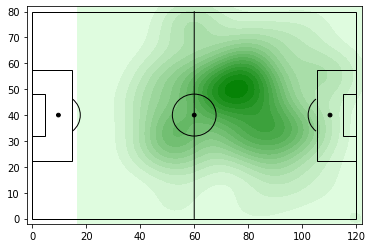

In [58]:
# fig=plt.figure() #set up the figures
# fig.set_size_inches(8, 5)
# ax=fig.add_subplot(1,1,1)

fig, ax = plt.subplots()

x_coord = [i[0] for i in df_events_messi["start_pos"]]
y_coord = [i[1] for i in df_events_messi["start_pos"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 16)

draw_pitch(ax) #overlay our different objects on the pitch

plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')
plt.show()

<h4> Lionel Messi's heatmap for the match Barcelona vs Real Madrid played on the 6 May,2018 clearly shows that he is a center attacking midfielder who creates play within the opposition's half on the pitch. With respect to Ronaldo, Messi has minimal defensive capabilities. However, he is not a defensive player either. Also, he does not get into the penalty box for scoring.
</h4>

<h1> CR2 (part2) </h1>

In [59]:
#load the json data into pandas dataframe
with open('/users/poojacj/Desktop/adm_hw2/events/events_Italy.json') as data_file:    
    data = json.load(data_file)
df_events_italy = json_normalize(data, sep = "_")

In [60]:
df_events_italy.head(10)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961
5,8,Simple pass,[{'id': 1801}],8306,"[{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]",2575959,Pass,3158,1H,10.376066,85,180423962
6,1,Ground attacking duel,"[{'id': 602}, {'id': 703}, {'id': 1801}]",8327,"[{'y': 25, 'x': 72}, {'y': 64, 'x': 82}]",2575959,Duel,3158,1H,10.796797,11,180423963
7,1,Ground defending duel,"[{'id': 504}, {'id': 701}, {'id': 1802}]",86366,"[{'y': 85, 'x': 36}, {'y': 75, 'x': 28}]",2575959,Duel,3172,1H,11.527556,12,180423976
8,1,Ground defending duel,"[{'id': 601}, {'id': 701}, {'id': 1802}]",20404,"[{'y': 75, 'x': 28}, {'y': 36, 'x': 18}]",2575959,Duel,3172,1H,12.156579,12,180423977
9,1,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",8327,"[{'y': 64, 'x': 82}, {'y': 18, 'x': 62}]",2575959,Duel,3158,1H,12.418937,11,180423965


In [61]:
#loading the match data
with open('/users/poojacj/Desktop/adm_hw2/matches/matches_Italy.json') as data_file:    
    data = json.load(data_file)
df_matches_italy = json_normalize(data, sep = "_")

In [62]:
#checking for Juventus - Napoli game played on the 22 April 2018
df_matches_italy[df_matches_italy["label"].str.contains("Juventus - Napoli")]

,status,roundId,gameweek,seasonId,dateutc,winner,venue,wyId,label,date,...,teamsData_3194_coachId,teamsData_3194_side,teamsData_3194_teamId,teamsData_3194_score,teamsData_3194_scoreP,teamsData_3194_hasFormation,teamsData_3194_formation_bench,teamsData_3194_formation_lineup,teamsData_3194_formation_substitutions,teamsData_3194_scoreHT
41,Played,4406278,34,181248,2018-04-22 18:45:00,3187,,2576295,"Juventus - Napoli, 0 - 1","April 22, 2018 at 8:45:00 PM GMT+2",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#matching the wyId of matches data to matchId of events data to get the appropriate data
df_events_italy  = df_events_italy[df_events_italy["matchId"] == 2576295]

In [64]:
df_events_italy

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
573095,8,Simple pass,[{'id': 1801}],21385,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 38}]",2576295,Pass,3187,1H,1.265726,85,245487374
573096,8,Simple pass,[{'id': 1801}],3300,"[{'y': 53, 'x': 38}, {'y': 52, 'x': 38}]",2576295,Pass,3187,1H,2.087491,85,245487375
573097,8,High pass,[{'id': 1802}],25726,"[{'y': 52, 'x': 38}, {'y': 100, 'x': 82}]",2576295,Pass,3187,1H,3.184110,83,245487376
573098,5,Ball out of the field,[],0,"[{'y': 100, 'x': 82}, {'y': 100, 'x': 100}]",2576295,Interruption,3187,1H,7.898538,50,245487378
573099,3,Throw in,[{'id': 1801}],20588,"[{'y': 0, 'x': 17}, {'y': 35, 'x': 3}]",2576295,Free Kick,3159,1H,11.326685,36,245487369
...,...,...,...,...,...,...,...,...,...,...,...,...
574823,3,Free Kick,[{'id': 1801}],7949,"[{'y': 50, 'x': 17}, {'y': 12, 'x': 74}]",2576295,Free Kick,3187,2H,2936.285468,31,245489177
574824,1,Air duel,"[{'id': 701}, {'id': 1802}]",99452,"[{'y': 12, 'x': 74}, {'y': 14, 'x': 65}]",2576295,Duel,3187,2H,2939.176668,10,245489178
574825,1,Air duel,"[{'id': 703}, {'id': 1801}]",20465,"[{'y': 88, 'x': 26}, {'y': 86, 'x': 35}]",2576295,Duel,3159,2H,2939.432014,10,245488988
574826,8,Head pass,"[{'id': 1401}, {'id': 1801}]",99902,"[{'y': 14, 'x': 65}, {'y': 6, 'x': 68}]",2576295,Pass,3187,2H,2941.102559,82,245489179


In [65]:
#considering only passes
df_events_italy = df_events_italy[df_events_italy["eventId"] == 8]

In [66]:
df_events_italy

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
573095,8,Simple pass,[{'id': 1801}],21385,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 38}]",2576295,Pass,3187,1H,1.265726,85,245487374
573096,8,Simple pass,[{'id': 1801}],3300,"[{'y': 53, 'x': 38}, {'y': 52, 'x': 38}]",2576295,Pass,3187,1H,2.087491,85,245487375
573097,8,High pass,[{'id': 1802}],25726,"[{'y': 52, 'x': 38}, {'y': 100, 'x': 82}]",2576295,Pass,3187,1H,3.184110,83,245487376
573100,8,Simple pass,[{'id': 1801}],20461,"[{'y': 35, 'x': 3}, {'y': 76, 'x': 8}]",2576295,Pass,3159,1H,13.179059,85,245487370
573101,8,Simple pass,[{'id': 1801}],20579,"[{'y': 76, 'x': 8}, {'y': 93, 'x': 13}]",2576295,Pass,3159,1H,15.953909,85,245487371
...,...,...,...,...,...,...,...,...,...,...,...,...
574819,8,Simple pass,[{'id': 1801}],25437,"[{'y': 65, 'x': 73}, {'y': 64, 'x': 73}]",2576295,Pass,3159,2H,2895.696896,85,245488981
574820,8,Head pass,[{'id': 1801}],20443,"[{'y': 64, 'x': 73}, {'y': 97, 'x': 72}]",2576295,Pass,3159,2H,2897.428025,82,245488982
574821,8,Cross,"[{'id': 402}, {'id': 801}, {'id': 1802}]",20751,"[{'y': 97, 'x': 72}, {'y': 49, 'x': 85}]",2576295,Pass,3159,2H,2899.193081,80,245488983
574826,8,Head pass,"[{'id': 1401}, {'id': 1801}]",99902,"[{'y': 14, 'x': 65}, {'y': 6, 'x': 68}]",2576295,Pass,3187,2H,2941.102559,82,245489179


In [67]:
#checking the wyId of Jorginho
df_player[df_player["firstName"] == "Jorge Luiz"]

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,role_code2,role_code3,role_name,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
1658,65,Jorge Luiz,,Frello Filho,3187,1991-12-20,180,21315,right,Jorginho,...,380,ITA,IT,MD,MID,Midfielder,Brazil,76,BRA,BR


In [68]:
#checking the wyId of Miralem Pjanic
df_player[df_player["firstName"] == "Miralem"]

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,role_code2,role_code3,role_name,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
1482,74,Miralem,,Pjani\u0107,3159,1990-04-02,180,20443,right,M. Pjani\u0107,...,442,LUX,LU,MD,MID,Midfielder,Bosnia-Herzegovina,70,BIH,BA


In [69]:
#considering only the events by Jorginho
df_events_italy = df_events_italy[(df_events_italy["playerId"] == 21315) | (df_events_italy["playerId"] == 20443)]

In [70]:
df_events_italy

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
573105,8,Simple pass,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,1H,26.160914,85,245487395
573107,8,High pass,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,1H,33.120179,83,245487399
573126,8,Simple pass,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,1H,120.169376,85,245487410
573145,8,Simple pass,[{'id': 1801}],21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",2576295,Pass,3187,1H,166.338197,85,245487404
573164,8,Head pass,"[{'id': 1401}, {'id': 1802}]",21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",2576295,Pass,3187,1H,206.466357,82,245487433
...,...,...,...,...,...,...,...,...,...,...,...,...
574742,8,Simple pass,[{'id': 1801}],21315,"[{'y': 28, 'x': 71}, {'y': 21, 'x': 71}]",2576295,Pass,3187,2H,2553.325865,85,245489142
574769,8,High pass,[{'id': 1801}],21315,"[{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]",2576295,Pass,3187,2H,2608.096907,83,245489158
574778,8,Simple pass,[{'id': 1801}],20443,"[{'y': 50, 'x': 50}, {'y': 51, 'x': 34}]",2576295,Pass,3159,2H,2733.388160,85,245488935
574794,8,Simple pass,[{'id': 1801}],20443,"[{'y': 44, 'x': 47}, {'y': 63, 'x': 45}]",2576295,Pass,3159,2H,2778.815591,85,245488959


In [71]:
#separating out the position values for Miralem Pjanic and Jorginho
filtered_data_start_pos_mj = []
filtered_data_end_pos_mj = []
for i,x in df_events_italy['positions'].items():
    filtered_data_start_pos_mj.append({'index': i, 'start_pos': x[0]})
    filtered_data_end_pos_mj.append({'index': i, 'start_pos': x[1]}) 

In [72]:
filtered_data_start_pos_mj = pd.DataFrame(filtered_data_start_pos_mj)
filtered_data_end_pos_mj = pd.DataFrame(filtered_data_end_pos_mj)

In [73]:
#setting the index 
filtered_data_start_pos_mj = filtered_data_start_pos_mj.set_index('index')
filtered_data_end_pos_mj = filtered_data_end_pos_mj.set_index('index') 

In [74]:
#merge events and filtered position dataframes on index
df_events_italy = df_events_italy.merge(filtered_data_start_pos_mj, left_index=True, right_index=True)

In [75]:
#merge events and filtered position dataframes on index
df_events_italy = df_events_italy.merge(filtered_data_end_pos_mj, left_index=True, right_index=True)

In [76]:
df_events_italy.drop(['eventId','subEventName','matchPeriod','eventSec','subEventId'], axis=1, inplace=True)

In [77]:
df_events_italy

,tags,playerId,positions,matchId,eventName,teamId,id,start_pos_x,start_pos_y
573105,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,245487395,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}"
573107,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,245487399,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}"
573126,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,245487410,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}"
573145,[{'id': 1801}],21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",2576295,Pass,3187,245487404,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}"
573164,"[{'id': 1401}, {'id': 1802}]",21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",2576295,Pass,3187,245487433,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}"
...,...,...,...,...,...,...,...,...,...
574742,[{'id': 1801}],21315,"[{'y': 28, 'x': 71}, {'y': 21, 'x': 71}]",2576295,Pass,3187,245489142,"{'y': 28, 'x': 71}","{'y': 21, 'x': 71}"
574769,[{'id': 1801}],21315,"[{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]",2576295,Pass,3187,245489158,"{'y': 45, 'x': 67}","{'y': 11, 'x': 80}"
574778,[{'id': 1801}],20443,"[{'y': 50, 'x': 50}, {'y': 51, 'x': 34}]",2576295,Pass,3159,245488935,"{'y': 50, 'x': 50}","{'y': 51, 'x': 34}"
574794,[{'id': 1801}],20443,"[{'y': 44, 'x': 47}, {'y': 63, 'x': 45}]",2576295,Pass,3159,245488959,"{'y': 44, 'x': 47}","{'y': 63, 'x': 45}"


In [78]:
#rename the column names
df_events_italy.columns = ['tags','playerId','positions','matchId','eventName','teamId','id','start_position','end_position']

In [79]:
#rescaling the x and y coordinates
x_y_pos_start_mj = []
for i,j in df_events_italy["start_position"].items():
    x_y_pos_start_mj.append({'index': i, 'start_pos': [j['x']*1.2,j['y']*0.8]})

In [80]:
start_pos_mj = pd.DataFrame(x_y_pos_start_mj)

In [81]:
start_pos_mj

,index,start_pos
0,573105,"[33.6, 44.0]"
1,573107,"[37.199999999999996, 24.0]"
2,573126,"[75.6, 49.6]"
3,573145,"[56.4, 60.0]"
4,573164,"[85.2, 35.2]"
...,...,...
153,574742,"[85.2, 22.400000000000002]"
154,574769,"[80.39999999999999, 36.0]"
155,574778,"[60.0, 40.0]"
156,574794,"[56.4, 35.2]"


In [82]:
#setting the index 
start_pos_mj = start_pos_mj.set_index('index')

In [83]:
#merge teams and filtered dataframes on index
df_events_italy = df_events_italy.merge(start_pos_mj, left_index=True, right_index=True)

In [84]:
df_events_italy

,tags,playerId,positions,matchId,eventName,teamId,id,start_position,end_position,start_pos
573105,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,245487395,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}","[33.6, 44.0]"
573107,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,245487399,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}","[37.199999999999996, 24.0]"
573126,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,245487410,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}","[75.6, 49.6]"
573145,[{'id': 1801}],21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",2576295,Pass,3187,245487404,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}","[56.4, 60.0]"
573164,"[{'id': 1401}, {'id': 1802}]",21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",2576295,Pass,3187,245487433,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}","[85.2, 35.2]"
...,...,...,...,...,...,...,...,...,...,...
574742,[{'id': 1801}],21315,"[{'y': 28, 'x': 71}, {'y': 21, 'x': 71}]",2576295,Pass,3187,245489142,"{'y': 28, 'x': 71}","{'y': 21, 'x': 71}","[85.2, 22.400000000000002]"
574769,[{'id': 1801}],21315,"[{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]",2576295,Pass,3187,245489158,"{'y': 45, 'x': 67}","{'y': 11, 'x': 80}","[80.39999999999999, 36.0]"
574778,[{'id': 1801}],20443,"[{'y': 50, 'x': 50}, {'y': 51, 'x': 34}]",2576295,Pass,3159,245488935,"{'y': 50, 'x': 50}","{'y': 51, 'x': 34}","[60.0, 40.0]"
574794,[{'id': 1801}],20443,"[{'y': 44, 'x': 47}, {'y': 63, 'x': 45}]",2576295,Pass,3159,245488959,"{'y': 44, 'x': 47}","{'y': 63, 'x': 45}","[56.4, 35.2]"


In [85]:
#rescaling the x and y coordinates
x_y_pos_end_mj = []
for i,j in df_events_italy["end_position"].items():
    x_y_pos_end_mj.append({'index': i, 'end_pos': [j['x']*1.2,j['y']*0.8]})

In [86]:
end_pos_mj = pd.DataFrame(x_y_pos_end_mj)

In [87]:
end_pos_mj

,index,end_pos
0,573105,"[46.8, 1.6]"
1,573107,"[37.199999999999996, 67.2]"
2,573126,"[75.6, 37.6]"
3,573145,"[74.39999999999999, 56.800000000000004]"
4,573164,"[82.8, 33.6]"
...,...,...
153,574742,"[85.2, 16.8]"
154,574769,"[96.0, 8.8]"
155,574778,"[40.8, 40.800000000000004]"
156,574794,"[54.0, 50.400000000000006]"


In [88]:
#setting the index 
end_pos_mj = end_pos_mj.set_index('index')

In [89]:
#merge teams and filtered dataframes on index
df_events_italy = df_events_italy.merge(end_pos_mj, left_index=True, right_index=True)

In [90]:
df_events_italy

,tags,playerId,positions,matchId,eventName,teamId,id,start_position,end_position,start_pos,end_pos
573105,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,245487395,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}","[33.6, 44.0]","[46.8, 1.6]"
573107,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,245487399,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}","[37.199999999999996, 24.0]","[37.199999999999996, 67.2]"
573126,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,245487410,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}","[75.6, 49.6]","[75.6, 37.6]"
573145,[{'id': 1801}],21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",2576295,Pass,3187,245487404,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}","[56.4, 60.0]","[74.39999999999999, 56.800000000000004]"
573164,"[{'id': 1401}, {'id': 1802}]",21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",2576295,Pass,3187,245487433,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}","[85.2, 35.2]","[82.8, 33.6]"
...,...,...,...,...,...,...,...,...,...,...,...
574742,[{'id': 1801}],21315,"[{'y': 28, 'x': 71}, {'y': 21, 'x': 71}]",2576295,Pass,3187,245489142,"{'y': 28, 'x': 71}","{'y': 21, 'x': 71}","[85.2, 22.400000000000002]","[85.2, 16.8]"
574769,[{'id': 1801}],21315,"[{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]",2576295,Pass,3187,245489158,"{'y': 45, 'x': 67}","{'y': 11, 'x': 80}","[80.39999999999999, 36.0]","[96.0, 8.8]"
574778,[{'id': 1801}],20443,"[{'y': 50, 'x': 50}, {'y': 51, 'x': 34}]",2576295,Pass,3159,245488935,"{'y': 50, 'x': 50}","{'y': 51, 'x': 34}","[60.0, 40.0]","[40.8, 40.800000000000004]"
574794,[{'id': 1801}],20443,"[{'y': 44, 'x': 47}, {'y': 63, 'x': 45}]",2576295,Pass,3159,245488959,"{'y': 44, 'x': 47}","{'y': 63, 'x': 45}","[56.4, 35.2]","[54.0, 50.400000000000006]"


In [91]:
#add another column in the dataframe called "AccuratePass" as 1 if tags = 703 otherwise 0
filtered_data_italy = []
for i,x in df_events_italy['tags'].items():
    for j in x:
        if j['id'] == 1801:
            filtered_data_italy.append({'index': i, 'tags': x, 'AccuratePass': int(1)})
        elif j['id'] == 1802:
            filtered_data_italy.append({'index': i, 'tags': x, 'AccuratePass': int(0)})

In [92]:
filtered_data_italy

[{'index': 573105, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573107, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573126, 'tags': [{'id': 1401}, {'id': 1801}], 'AccuratePass': 1},
 {'index': 573145, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573164, 'tags': [{'id': 1401}, {'id': 1802}], 'AccuratePass': 0},
 {'index': 573188, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573220,
  'tags': [{'id': 1401}, {'id': 1001}, {'id': 1802}],
  'AccuratePass': 0},
 {'index': 573225, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573231, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573234, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573237, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573242, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573247, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573256, 'tags': [{'id': 1801}], 'AccuratePass': 1},
 {'index': 573258, 'tags': [{'id': 1801}], 'AccuratePass':

In [93]:
filtered_data_italy = pd.DataFrame(filtered_data_italy)

In [94]:
#setting the index 
filtered_data_italy = filtered_data_italy.set_index('index')

In [95]:
filtered_data_italy

,tags,AccuratePass
index,,
573105,[{'id': 1801}],1
573107,[{'id': 1801}],1
573126,"[{'id': 1401}, {'id': 1801}]",1
573145,[{'id': 1801}],1
573164,"[{'id': 1401}, {'id': 1802}]",0
...,...,...
574742,[{'id': 1801}],1
574769,[{'id': 1801}],1
574778,[{'id': 1801}],1


In [96]:
#merge events and filtered dataframes on index
df_events_italy = df_events_italy.merge(filtered_data_italy, left_index=True, right_index=True)

In [97]:
df_events_italy

,tags_x,playerId,positions,matchId,eventName,teamId,id,start_position,end_position,start_pos,end_pos,tags_y,AccuratePass
573105,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,245487395,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}","[33.6, 44.0]","[46.8, 1.6]",[{'id': 1801}],1
573107,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,245487399,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}","[37.199999999999996, 24.0]","[37.199999999999996, 67.2]",[{'id': 1801}],1
573126,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,245487410,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}","[75.6, 49.6]","[75.6, 37.6]","[{'id': 1401}, {'id': 1801}]",1
573145,[{'id': 1801}],21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",2576295,Pass,3187,245487404,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}","[56.4, 60.0]","[74.39999999999999, 56.800000000000004]",[{'id': 1801}],1
573164,"[{'id': 1401}, {'id': 1802}]",21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",2576295,Pass,3187,245487433,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}","[85.2, 35.2]","[82.8, 33.6]","[{'id': 1401}, {'id': 1802}]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574742,[{'id': 1801}],21315,"[{'y': 28, 'x': 71}, {'y': 21, 'x': 71}]",2576295,Pass,3187,245489142,"{'y': 28, 'x': 71}","{'y': 21, 'x': 71}","[85.2, 22.400000000000002]","[85.2, 16.8]",[{'id': 1801}],1
574769,[{'id': 1801}],21315,"[{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]",2576295,Pass,3187,245489158,"{'y': 45, 'x': 67}","{'y': 11, 'x': 80}","[80.39999999999999, 36.0]","[96.0, 8.8]",[{'id': 1801}],1
574778,[{'id': 1801}],20443,"[{'y': 50, 'x': 50}, {'y': 51, 'x': 34}]",2576295,Pass,3159,245488935,"{'y': 50, 'x': 50}","{'y': 51, 'x': 34}","[60.0, 40.0]","[40.8, 40.800000000000004]",[{'id': 1801}],1
574794,[{'id': 1801}],20443,"[{'y': 44, 'x': 47}, {'y': 63, 'x': 45}]",2576295,Pass,3159,245488959,"{'y': 44, 'x': 47}","{'y': 63, 'x': 45}","[56.4, 35.2]","[54.0, 50.400000000000006]",[{'id': 1801}],1


In [98]:
df_events_italy

,tags_x,playerId,positions,matchId,eventName,teamId,id,start_position,end_position,start_pos,end_pos,tags_y,AccuratePass
573105,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,245487395,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}","[33.6, 44.0]","[46.8, 1.6]",[{'id': 1801}],1
573107,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,245487399,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}","[37.199999999999996, 24.0]","[37.199999999999996, 67.2]",[{'id': 1801}],1
573126,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,245487410,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}","[75.6, 49.6]","[75.6, 37.6]","[{'id': 1401}, {'id': 1801}]",1
573145,[{'id': 1801}],21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",2576295,Pass,3187,245487404,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}","[56.4, 60.0]","[74.39999999999999, 56.800000000000004]",[{'id': 1801}],1
573164,"[{'id': 1401}, {'id': 1802}]",21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",2576295,Pass,3187,245487433,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}","[85.2, 35.2]","[82.8, 33.6]","[{'id': 1401}, {'id': 1802}]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574742,[{'id': 1801}],21315,"[{'y': 28, 'x': 71}, {'y': 21, 'x': 71}]",2576295,Pass,3187,245489142,"{'y': 28, 'x': 71}","{'y': 21, 'x': 71}","[85.2, 22.400000000000002]","[85.2, 16.8]",[{'id': 1801}],1
574769,[{'id': 1801}],21315,"[{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]",2576295,Pass,3187,245489158,"{'y': 45, 'x': 67}","{'y': 11, 'x': 80}","[80.39999999999999, 36.0]","[96.0, 8.8]",[{'id': 1801}],1
574778,[{'id': 1801}],20443,"[{'y': 50, 'x': 50}, {'y': 51, 'x': 34}]",2576295,Pass,3159,245488935,"{'y': 50, 'x': 50}","{'y': 51, 'x': 34}","[60.0, 40.0]","[40.8, 40.800000000000004]",[{'id': 1801}],1
574794,[{'id': 1801}],20443,"[{'y': 44, 'x': 47}, {'y': 63, 'x': 45}]",2576295,Pass,3159,245488959,"{'y': 44, 'x': 47}","{'y': 63, 'x': 45}","[56.4, 35.2]","[54.0, 50.400000000000006]",[{'id': 1801}],1


In [99]:
#considering only Miralem Pjanic
df_Miralem_Pjanic = df_events_italy[df_events_italy["playerId"] == 20443]

In [100]:
#considering only Jorginho
df_Jorginho = df_events_italy[df_events_italy["playerId"] == 21315]

In [101]:
df_events_italy_accurate = df_events_italy[df_events_italy["AccuratePass"] == 1]

In [102]:
df_events_italy_accurate

,tags_x,playerId,positions,matchId,eventName,teamId,id,start_position,end_position,start_pos,end_pos,tags_y,AccuratePass
573105,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,245487395,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}","[33.6, 44.0]","[46.8, 1.6]",[{'id': 1801}],1
573107,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,245487399,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}","[37.199999999999996, 24.0]","[37.199999999999996, 67.2]",[{'id': 1801}],1
573126,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,245487410,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}","[75.6, 49.6]","[75.6, 37.6]","[{'id': 1401}, {'id': 1801}]",1
573145,[{'id': 1801}],21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",2576295,Pass,3187,245487404,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}","[56.4, 60.0]","[74.39999999999999, 56.800000000000004]",[{'id': 1801}],1
573188,[{'id': 1801}],21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",2576295,Pass,3187,245487461,"{'y': 72, 'x': 47}","{'y': 96, 'x': 61}","[56.4, 57.6]","[73.2, 76.80000000000001]",[{'id': 1801}],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574742,[{'id': 1801}],21315,"[{'y': 28, 'x': 71}, {'y': 21, 'x': 71}]",2576295,Pass,3187,245489142,"{'y': 28, 'x': 71}","{'y': 21, 'x': 71}","[85.2, 22.400000000000002]","[85.2, 16.8]",[{'id': 1801}],1
574769,[{'id': 1801}],21315,"[{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]",2576295,Pass,3187,245489158,"{'y': 45, 'x': 67}","{'y': 11, 'x': 80}","[80.39999999999999, 36.0]","[96.0, 8.8]",[{'id': 1801}],1
574778,[{'id': 1801}],20443,"[{'y': 50, 'x': 50}, {'y': 51, 'x': 34}]",2576295,Pass,3159,245488935,"{'y': 50, 'x': 50}","{'y': 51, 'x': 34}","[60.0, 40.0]","[40.8, 40.800000000000004]",[{'id': 1801}],1
574794,[{'id': 1801}],20443,"[{'y': 44, 'x': 47}, {'y': 63, 'x': 45}]",2576295,Pass,3159,245488959,"{'y': 44, 'x': 47}","{'y': 63, 'x': 45}","[56.4, 35.2]","[54.0, 50.400000000000006]",[{'id': 1801}],1


In [103]:
#considering only Miralem Pjanic
df_Miralem_Pjanic_accurate = df_events_italy_accurate[df_events_italy_accurate["playerId"] == 20443]

In [104]:
#considering only Jorginho
df_Jorginho_accurate = df_events_italy_accurate[df_events_italy_accurate["playerId"] == 21315]

In [105]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = patches.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = patches.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = patches.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = patches.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = patches.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = patches.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = patches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = patches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

<h1> Passmap of Jorginho (in red) and Miralem Pjanic (in blue) for all passes </h1>

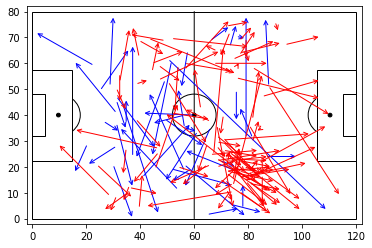

In [106]:
fig, ax = plt.subplots()


draw_pitch(ax) #overlay our different objects on the pitch

for i in range(len(df_Miralem_Pjanic)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_Miralem_Pjanic.iloc[i]['end_pos'][0], df_Miralem_Pjanic.iloc[i]['end_pos'][1]), xycoords = 'data',
               xytext = (df_Miralem_Pjanic.iloc[i]['start_pos'][0], df_Miralem_Pjanic.iloc[i]['start_pos'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
    
for i in range(len(df_Jorginho)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_Jorginho.iloc[i]['end_pos'][0], df_Jorginho.iloc[i]['end_pos'][1]), xycoords = 'data',
               xytext = (df_Jorginho.iloc[i]['start_pos'][0], df_Jorginho.iloc[i]['start_pos'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))

plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')
plt.show()

<h4> Jorginho is a right attacking midfielder who supplies passes to the forwards. He rotates the ball by passing to his teammates across the midfield. Pjanic is an attacking midfielder with minimal passes in the defence. With respect to Jorginho he rotates the ball more in the midfield of the opposition's half. Also, he does not supply the ball to the forwards. </h4>

<h1> Passmap of Jorginho (in red) and Miralem Pjanic (in blue) for accurate passes </h1>

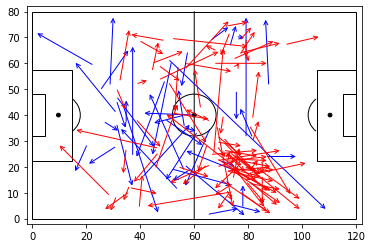

In [107]:
fig, ax = plt.subplots()

draw_pitch(ax) #overlay our different objects on the pitch

for i in range(len(df_Miralem_Pjanic_accurate)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_Miralem_Pjanic_accurate.iloc[i]['end_pos'][0], df_Miralem_Pjanic_accurate.iloc[i]['end_pos'][1]), xycoords = 'data',
               xytext = (df_Miralem_Pjanic_accurate.iloc[i]['start_pos'][0], df_Miralem_Pjanic_accurate.iloc[i]['start_pos'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
    
for i in range(len(df_Jorginho_accurate)):    
    ax.annotate("", xy = (df_Jorginho_accurate.iloc[i]['end_pos'][0], df_Jorginho_accurate.iloc[i]['end_pos'][1]), xycoords = 'data',
               xytext = (df_Jorginho_accurate.iloc[i]['start_pos'][0], df_Jorginho_accurate.iloc[i]['start_pos'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))  

plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')
plt.show()

<h4> In the above heatmap which shows the accurate passes, it suggests that Jorginho was not successful while providing the pass to the forwads while Pjanic did not even attempt that. </h4>